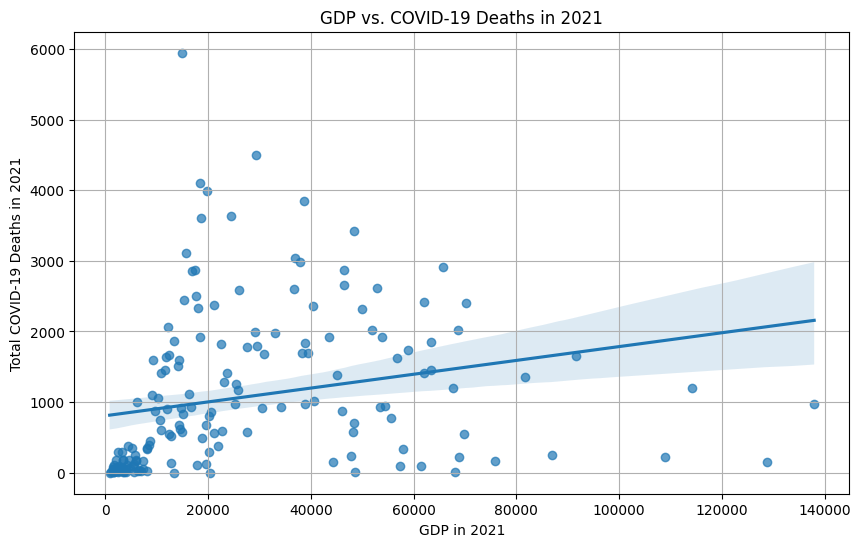

ValueError: Value of 'dimensions_2' is not the name of a column in 'data_frame'. Expected one of ['location', 'total_deaths_per_million', '2021'] but received: total_cases_per_million

In [6]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]
covid_deaths_2021 = covid_2021_df.groupby('location').last()['total_deaths_per_million'].reset_index()


gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

merged_df = pd.merge(covid_deaths_2021, gdp_df, on='location', how='inner')

#merged_df = merged_df[merged_df['location'] != 'World'] 


plt.figure(figsize=(10, 6))
sns.regplot(
    x='2021',
    y='total_deaths_per_million', 
    data=merged_df, 
    scatter_kws={'alpha':0.7}
)

# Customizing the plot
plt.title('GDP vs. COVID-19 Deaths in 2021')
plt.xlabel('GDP in 2021')
plt.ylabel('Total COVID-19 Deaths in 2021')
plt.grid(True)  # Adding grid

# Display the plot
plt.show()

fig = go.Figure(data=go.Scatter(
    x=merged_df['2021'],
    y=merged_df['total_deaths_per_million'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',  # You can set a color if needed
        opacity=0.8,
        
    ),
    text=merged_df['location']
))

# Customize layout
fig.update_layout(
    title='GDP vs. COVID-19 Deaths in 2021',
    xaxis_title='GDP in 2021',
    yaxis_title='Total COVID-19 Deaths in 2021',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

# Show the plot
fig.show()
x_value = covid_2021_df.groupby('location').last()['people_vaccinated_per_hundred'].reset_index()
y_value = covid_2021_df.groupby('location').last()['excess_mortality_cumulative_per_million'].reset_index()

# Creating the figure
fig2 = go.Figure(data=go.Scatter(
    x=x_value['people_vaccinated_per_hundred'],
    y=y_value['excess_mortality_cumulative_per_million'],
    mode='markers',
    marker=dict(
        size=10,
        color='blue',  # You can set a color if needed
        opacity=0.8,
    ),
    text=covid_2021_df['location'].iloc[-1]  # Assuming 'location' is the country name
))

# Customize layout
fig2.update_layout(
    title='Excess mortality rate vs. People vaccinated per hundred in 2021',
    xaxis_title='People vaccinated per hundred in 2021',
    yaxis_title='Excess mortality per mil in 2021',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

# Show the plot
fig2.show()
income_categories = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

filtered_df = covid_2021_df[covid_2021_df['location'].isin(income_categories)]

aggregated_df = filtered_df.groupby('location').last()['total_cases_per_million'].reset_index()

trace = go.Bar(
    x=aggregated_df['location'],
    y=aggregated_df['total_cases_per_million']
)

layout = go.Layout(
    title='Total Cases per Million by Income Category',
    xaxis=dict(title='Income Category'),
    yaxis=dict(title='Total Cases per Million')
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()

fig3 = px.box(
    merged_df, 
    x='2021', 
    y='total_deaths_per_million', 
    title='Customized Interactive Box Plot',
    points="all"  # Show all points
)
fig3.update_layout(
    xaxis_title='Your Category',
    yaxis_title='Your Value'
)
fig3.show()

# Step 2: Select the variables you want to compare
variables_to_compare = ['total_deaths_per_million', '2021', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'total_tests_per_million']


fig4 = px.parallel_coordinates(merged_df, dimensions=variables_to_compare)
fig4.show()

In [8]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load your datasets
covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

# Filter COVID data for the year 2021
covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]

# List of variables to get the last value for
variables = ['total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred']

# Dictionary to hold the last value DataFrames
last_values_dfs = {}

# Group by 'location' and get the last value for each variable
for var in variables:
    last_values_dfs[var] = covid_2021_df.groupby('location').last()[var].reset_index()

# Start with the first DataFrame
merged_df = last_values_dfs[variables[0]]

# Merge the rest of the DataFrames
for var in variables[1:]:
    merged_df = pd.merge(merged_df, last_values_dfs[var], on='location', how='left')

# Load and preprocess GDP data
gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

# Merge with the COVID data
final_merged_df = pd.merge(merged_df, gdp_df, on='location', how='inner')

variables_to_compare = ['total_deaths_per_million', '2021', 'total_cases_per_million', 'people_vaccinated_per_hundred']


fig4 = px.parallel_coordinates(final_merged_df, dimensions=variables_to_compare)
fig4.show()

In [30]:
import pandas as pd
import plotly.express as px

# Load your datasets
covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

# Filter COVID data for the year 2021
covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]

# List of variables to get the last value for
variables = ['total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred']

# Dictionary to hold the last value DataFrames
last_values_dfs = {}

# Group by 'location' and get the last value for each variable
for var in variables:
    last_values_dfs[var] = covid_2021_df.groupby('location').last()[var].reset_index()

# Start with the first DataFrame
merged_df = last_values_dfs[variables[0]]

# Merge the rest of the DataFrames
for var in variables[1:]:
    merged_df = pd.merge(merged_df, last_values_dfs[var], on='location', how='left')

# Load and preprocess GDP data
gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

# Merge with the COVID data
final_merged_df = pd.merge(merged_df, gdp_df, on='location', how='inner')

# Assuming '2021' column in final_merged_df contains numerical GDP data

variables_to_compare = ['2021', 'total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred']

# Plotting with Plotly Express
fig = px.parallel_coordinates(final_merged_df, 
                              dimensions=variables_to_compare, 
                              color='location', 
                              labels={'2021': 'GDP (2021)', 'location': 'Country'})

fig.update_layout(
    title='Comparison of COVID-19 and GDP Metrics (2021)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()



ValueError: 
    Invalid element(s) received for the 'color' property of parcoords.line
        Invalid elements include: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcoords.line.colorscale
      - A list or array of any of the above

In [27]:
import pandas as pd
import plotly.graph_objs as go

# Load your datasets
covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

# Filter COVID data for the year 2021
covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]

# List of variables to get the last value for
variables = ['total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred']

# Dictionary to hold the last value DataFrames
last_values_dfs = {}

# Group by 'location' and get the last value for each variable
for var in variables:
    last_values_dfs[var] = covid_2021_df.groupby('location').last()[var].reset_index()

# Start with the first DataFrame
merged_df = last_values_dfs[variables[0]]

# Merge the rest of the DataFrames
for var in variables[1:]:
    merged_df = pd.merge(merged_df, last_values_dfs[var], on='location', how='left')

# Load and preprocess GDP data
gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

# Merge with the COVID data
final_merged_df = pd.merge(merged_df, gdp_df, on='location', how='inner')

# Rename columns for clarity
final_merged_df = final_merged_df.rename(columns={"2021": "GDP_2021"})

# Define the dimensions for the parallel coordinates plot
dimensions = [
    {'label': 'Total Deaths per Million', 'values': final_merged_df['total_deaths_per_million']},
    {'label': 'Total Cases per Million', 'values': final_merged_df['total_cases_per_million']},
    {'label': 'People Vaccinated per Hundred', 'values': final_merged_df['people_vaccinated_per_hundred']},
    {'label': 'GDP 2021', 'values': final_merged_df['GDP_2021']}
]

# Create the parallel coordinates plot
fig = go.Figure(data=go.Parcoords(
    line=dict(color=final_merged_df['total_deaths_per_million'], colorscale='Viridis'),
    dimensions=dimensions
))

# Update the layout of the plot
fig.update_layout(
    title='Parallel Coordinates Plot of COVID-19 and GDP Data',
    height=600,
    width=1000
)

# Show the plot
fig.show()


In [58]:
import pandas as pd
import plotly.graph_objs as go

covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]

exclude_locations = ['World', 'Upper middle income', 'Lower middle income', 'High income', 'Low income',
                     'European Union', 'North America', 'South America', 'Asia', 'Oceania', 'Africa']

covid_2021_df = covid_2021_df[~covid_2021_df['location'].isin(exclude_locations)]

variables = ['total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'excess_mortality_cumulative_per_million']

last_values_dfs = {}

for var in variables:
    last_values_dfs[var] = covid_2021_df.groupby('location').last()[var].reset_index()

merged_df = last_values_dfs[variables[0]]

for var in variables[1:]:
    merged_df = pd.merge(merged_df, last_values_dfs[var], on='location', how='left')

gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

final_merged_df = pd.merge(merged_df, gdp_df, on='location', how='inner')

final_merged_df = final_merged_df.rename(columns={"2021": "GDP_2021"})


for var in variables + ['GDP_2021']:
    final_merged_df[f'{var}_category'] = pd.qcut(final_merged_df[var], q=3, labels=['low', 'medium', 'high'])

category_orders = {
    'GDP_2021_category': ['low', 'medium', 'high'],
    'total_deaths_per_million_category': ['low', 'medium', 'high'],
    'total_cases_per_million_category': ['low', 'medium', 'high'],
    'people_vaccinated_per_hundred_category': ['low', 'medium', 'high'],
    'excess_mortality_cumulative_per_million_category': ['low', 'medium', 'high'] 
}

for var in variables + ['GDP_2021']:
    final_merged_df[f'{var}_category'] = final_merged_df[f'{var}_category'].cat.add_categories('nan').fillna('nan')

dimensions = [
    {'label': 'GDP 2021', 'values': final_merged_df['GDP_2021_category'], 'categoryorder': 'array', 'categoryarray': category_orders['GDP_2021_category']},
    {'label': 'Total Deaths per Million', 'values': final_merged_df['total_deaths_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['total_deaths_per_million_category']},
    {'label': 'Total Cases per Million', 'values': final_merged_df['total_cases_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['total_cases_per_million_category']},
    {'label': 'People Vaccinated per Hundred', 'values': final_merged_df['people_vaccinated_per_hundred_category'], 'categoryorder': 'array', 'categoryarray': category_orders['people_vaccinated_per_hundred_category']},
    {'label': 'Excess Mortality per Million', 'values': final_merged_df['excess_mortality_cumulative_per_million_category'], 'categoryorder': 'array', 'categoryarray': category_orders['excess_mortality_cumulative_per_million_category']}  # Corrected label and reference to categorical column
]

fig = go.Figure(data=[
    go.Parcats(
        dimensions=dimensions,
        line={'color': final_merged_df['GDP_2021_category'].cat.codes, 'colorscale': 'Viridis', 'showscale': False},  # Set showscale=False to hide the color scale
        hoverinfo='count+probability',
        arrangement='freeform'
    )
])

fig.update_layout(
    title='Parallel Categories Plot of COVID-19 and GDP Data',
    height=600
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

covid_df = pd.read_csv('docs/owid-covid-data.csv')
gdp_df = pd.read_csv('docs/GDP-data.csv', skiprows=4)

covid_2021_df = covid_df[covid_df['date'].str.startswith('2021')]
covid_deaths_2021 = covid_2021_df.groupby('location').last()['median_age'].reset_index()


gdp_df = gdp_df.rename(columns={"Country Name": 'location'})
gdp_df = gdp_df[['location', "2021"]]

merged_df = pd.merge(covid_deaths_2021, gdp_df, on='location', how='inner')

ig = px.scatter(
    merged_df,
    x="2021",
    y="median_age",
    hover_name="location",
    trendline="ols",
    title="Comparison of GDP and Median Age",
    labels={
        "2021": "GDP",
        "median_age": "Median Age"
    }
)
fig